# HR Absentees Data Analysis

### Step 1: First import all neccessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Step 2: Load and Read the Data

In [2]:
data = pd.read_csv('HR Absentees Data.csv')

In [3]:
data.head(10)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
5,6,Jones,Ernie,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores
6,7,Buford,Ralph,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.752730,10.157918,60.495072,HeadOffice
7,8,Lee,Gregory,M,Sechelt,Baker,Bakery,West Vancouver,Stores,36.216031,4.432123,30.072902,Stores
8,9,Smith,Jerry,M,New Westminster,Baker,Bakery,New Westminster,Stores,58.427380,6.940121,181.630819,Stores
9,10,Beard,Robert,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.853980,13.848321,30.664408,HeadOffice


### Step 3: Data Exploring

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [5]:
data.isnull().sum() # As we can see there is no null Values present in our data

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64

In [6]:
data.duplicated().sum() # and no duplicate values as well

0

In [7]:
data.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


### Remove those persons who are under 18 and above 65

In [8]:
data = data.drop(data[data['Age']>65].index)

In [9]:
data = data.drop(data[data['Age']<18].index)

In [10]:
data

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


### Removing EmployeeNumber, ,GivenName, SurName as they don't seems to be relevant

In [11]:
data = data.drop(['EmployeeNumber', 'GivenName', 'Surname'], axis=1)

In [12]:
data

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...
8331,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8165 entries, 0 to 8335
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          8165 non-null   object 
 1   City            8165 non-null   object 
 2   JobTitle        8165 non-null   object 
 3   DepartmentName  8165 non-null   object 
 4   StoreLocation   8165 non-null   object 
 5   Division        8165 non-null   object 
 6   Age             8165 non-null   float64
 7   LengthService   8165 non-null   float64
 8   AbsentHours     8165 non-null   float64
 9   BusinessUnit    8165 non-null   object 
dtypes: float64(3), object(7)
memory usage: 701.7+ KB


### Step 3: Data Analyzing

UNIVARIATE ANALYSIS

In [19]:
#Bifurcating all categorical data in to cat_var
cat_var = [i for i in data.columns if data[i].dtypes == 'O']

In [21]:
#Bifurcating all numerical data in to num_var
num_var = [i for i in data.columns if data[i].dtypes != 'O']

In [22]:
data.describe(include='O')

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,BusinessUnit
count,8165,8165,8165,8165,8165,8165,8165
unique,2,243,47,21,40,6,2
top,M,Vancouver,Cashier,Customer Service,Vancouver,Stores,Stores
freq,4148,1751,1663,1695,1807,7993,7993


In [25]:
# Univariate analysis first for categorical data
cat_var

['Gender',
 'City',
 'JobTitle',
 'DepartmentName',
 'StoreLocation',
 'Division',
 'BusinessUnit']

<AxesSubplot:xlabel='Gender', ylabel='count'>

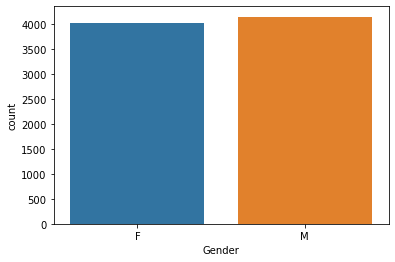

In [27]:
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='BusinessUnit', ylabel='count'>

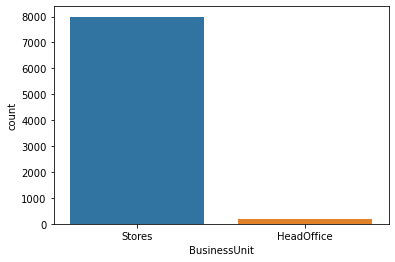

In [29]:
sns.countplot(data['BusinessUnit'])

Observation:-

   1. Number of men and women are almost equal.
   2. Fewer people are working in HeadOffice and most of the people are working in Store.

### Grouping the different job types into their respective groups

In [30]:
def Titles(job):
    if 'manager' in job.lower():
        job ='Manager'
    if 'director' in job.lower():
        job = 'Director'
    if 'clerk' in job.lower():
        job = 'Clerk'
    if 'analyst' in job.lower():
        job = 'Analyst'
    if 'vp' in job.lower():
        job = 'Vp'
    else:
        job = job
    return job

In [33]:
data['JobTitle'] = data['JobTitle'].apply(Titles)
#applying title function in data[jobtitle] column

In [35]:
data['JobTitle'].value_counts()

Cashier                            1663
Dairy Person                       1476
Meat Cutter                        1461
Baker                              1375
Clerk                              1147
Shelf Stocker                       701
Manager                             216
Analyst                              50
Auditor                              14
Trainer                              14
Recruiter                            12
Director                             11
Benefits Admin                       11
Vp                                    4
Corporate Lawyer                      3
Exec Assistant, Human Resources       2
Legal Counsel                         1
Exec Assistant, Legal Counsel         1
CHief Information Officer             1
Exec Assistant, Finance               1
CEO                                   1
Name: JobTitle, dtype: int64

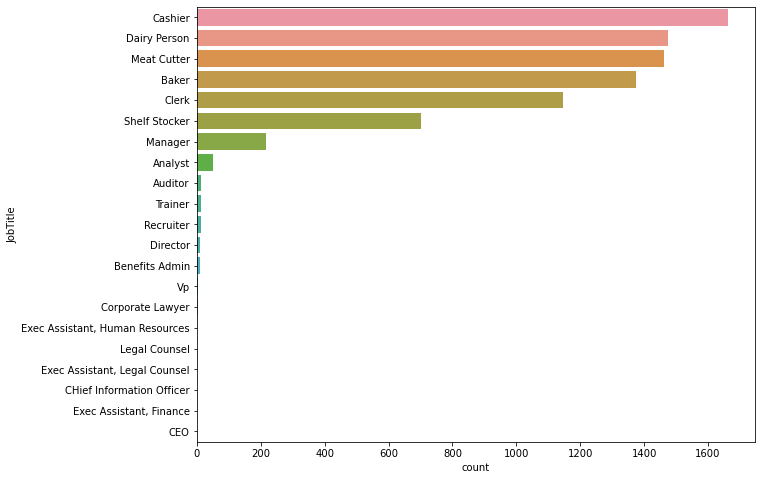

In [90]:
plt.figure(figsize = (10,8))
sns.countplot(y = data.JobTitle, order = data.JobTitle.value_counts().index);
# countplot of value counts of Jobtitles with descending order

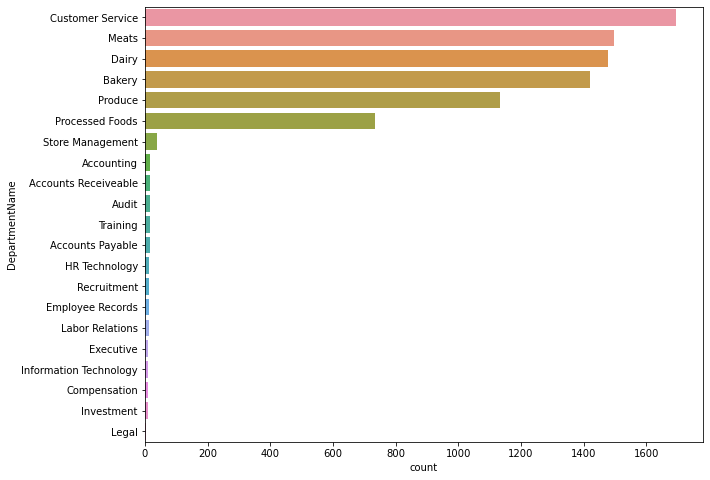

In [91]:
plt.figure(figsize = (10,8))
sns.countplot(y = data.DepartmentName, order = data.DepartmentName.value_counts().index);
# countplot of value couns of department name with descending order

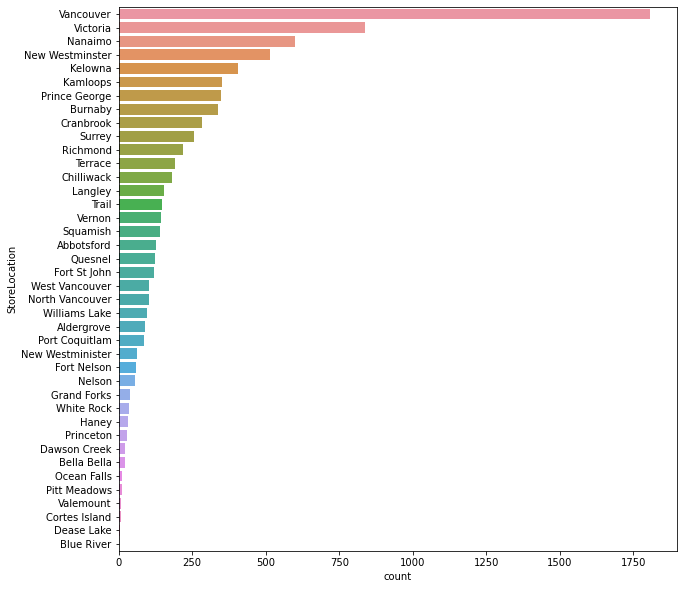

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(y = data.StoreLocation, order = data.StoreLocation.value_counts().index);
# countplot of value couns of store location with descending order

<AxesSubplot:ylabel='None'>

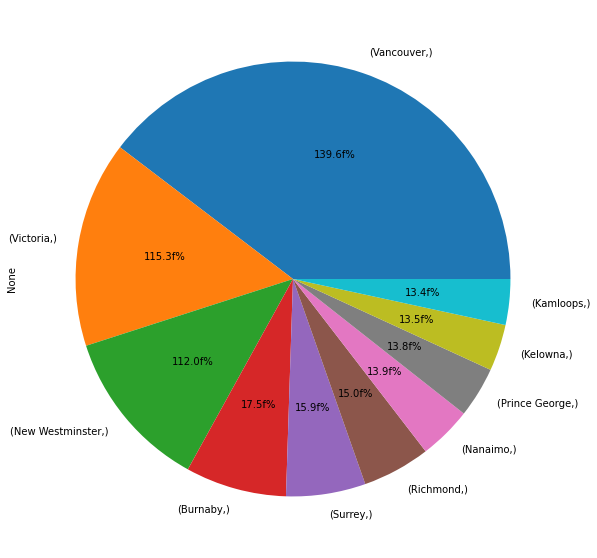

In [46]:
plt.figure(figsize=(10,10))
data[['City']].value_counts()[:10].plot(kind = 'pie', autopct = '1%.1ff%%') 
# pie chart for top 10 cities

Observation:-

    1.  We can see most people are working as 'cashier' in customer service and as 'meat cutter' and as 'bakers' in Bakery
    2.  Most Stores are present in Vancouver then in Victoria then in Nanaimo and then in New Westminster.

In [47]:
data.head(2)

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores


In [48]:
data['Division'].value_counts()

Stores                  7993
HumanResources            75
FinanceAndAccounting      73
Executive                 11
InfoTech                  10
Legal                      3
Name: Division, dtype: int64

Univariate analysis of Numercial columns

In [49]:
data.describe()

,Age,LengthService,AbsentHours
count,8165.000000,8165.000000,8165.000000
mean,41.985633,4.788871,60.471110
std,9.276915,2.478484,47.107030
min,18.204720,0.053279,0.000000
25%,35.456296,3.582605,20.067078
50%,42.097897,4.597999,55.862962
75%,48.513876,5.623582,93.381290
max,65.000000,43.735239,252.193535


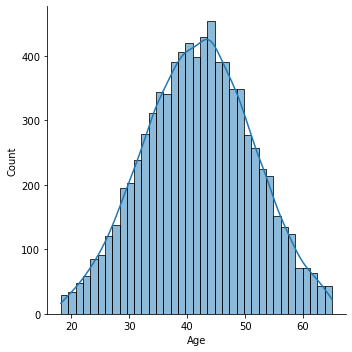

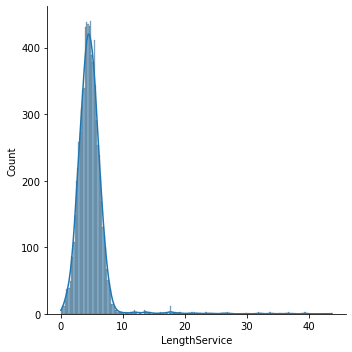

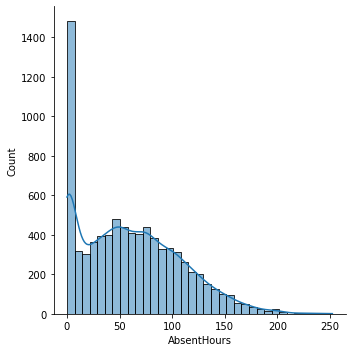

In [51]:
for i in num_var:
    print(sns.displot(data[i],kde = True));

Observations:-

    1. Age is Normally Distributed
    2. LengthService is slightly skewed right.
    3. AbsentHours is Log Normally Distributed i.e. skewed towards right which means:
        There are very few employee which are absent for longer period of time and vice versa...

In [53]:
data.corr()

,Age,LengthService,AbsentHours
Age,1.000000,0.056234,0.824613
LengthService,0.056234,1.000000,-0.046692
AbsentHours,0.824613,-0.046692,1.000000


Observation:-
    1.  As we can see that 'Age' and 'AbsentHours' are highly correlated,
           which means higher the age , higher will be the absent hours ..

### BIVARIATE ANALYSIS

Scatter plot

<AxesSubplot:xlabel='Age', ylabel='AbsentHours'>

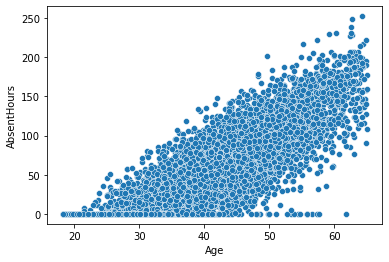

In [54]:
sns.scatterplot(data['Age'],data['AbsentHours'])

<AxesSubplot:xlabel='LengthService', ylabel='AbsentHours'>

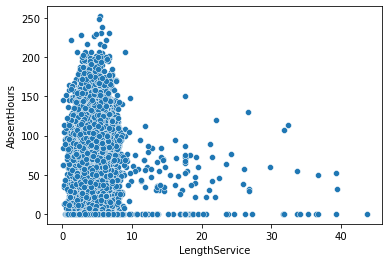

In [55]:
sns.scatterplot(data['LengthService'],data['AbsentHours'])

Observation:-
    

    . It's clearly visible as the 'Age Increases' , the number of 'absent hours also increases.
    . Whereas Length of service and absent hours does not have proper relevance with each other but -
         -When the length service is less , More the number of absent hours (right skewed)

Bar Plot

<AxesSubplot:xlabel='Gender', ylabel='AbsentHours'>

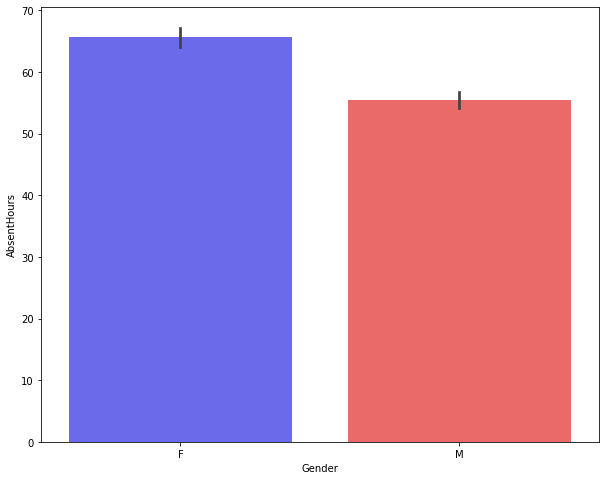

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(data['Gender'],data['AbsentHours'], palette ='seismic')

Observation:
    .Female tend to have more AbsentHours than men.

Box Plot

<AxesSubplot:xlabel='AbsentHours', ylabel='Gender'>

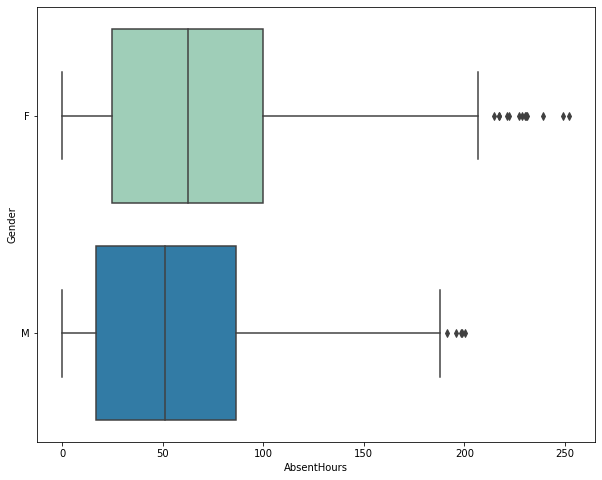

In [62]:
#GENDER
plt.figure(figsize = (10,8))
sns.boxplot(x='AbsentHours', y='Gender',data = data, palette ='YlGnBu')

In [63]:
data[data['AbsentHours']>200]['Gender'].value_counts()
# As we can see 26 females have 200+ absent hours and 1 male has 200+ absent hours.

F    26
M     1
Name: Gender, dtype: int64

Observation:

    .It's seen again female tend to have more absent hours than men.
    .Females have more outliers than men which means some Females are Absent for longer period of time than men.

<AxesSubplot:xlabel='AbsentHours', ylabel='StoreLocation'>

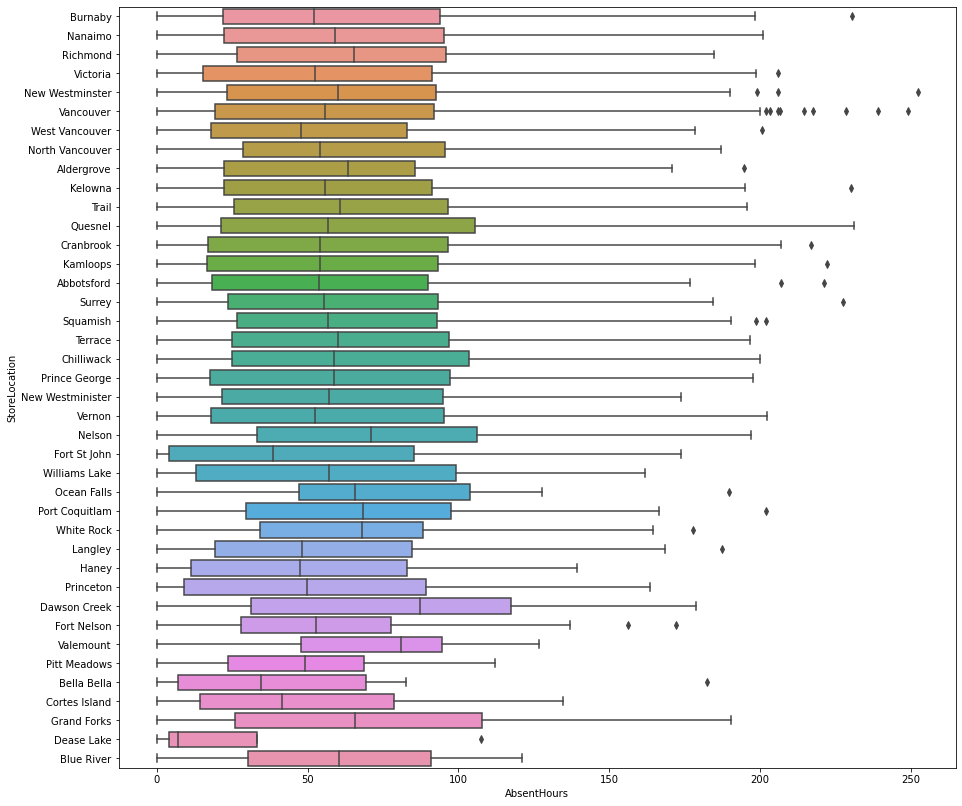

In [67]:
#absent hours in each storelocation
plt.figure(figsize=(15,14))
sns.boxplot(x='AbsentHours', y='StoreLocation', data= data, );

Observation:

    . As we can see Vancouver has the most outiers than any store location which means,
        many employees with high number of absent hours are from Vancouver..
    .New Westminster also has some outliers and it also has highest number of AbsentHours...

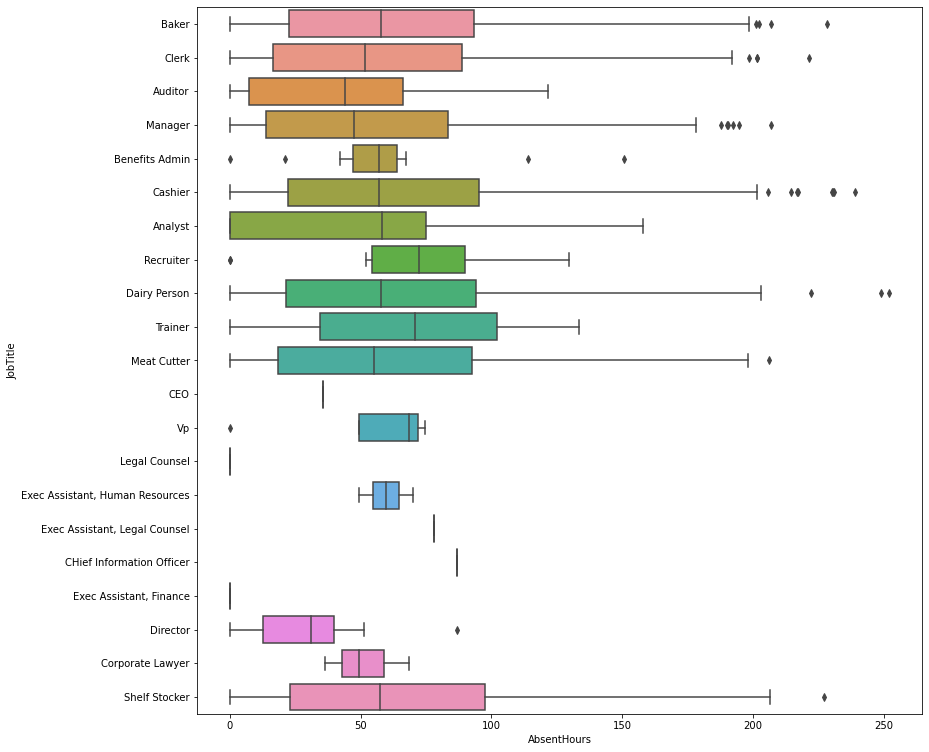

In [72]:
#absent hour in each job title
plt.figure(figsize = (13,13))
sns.boxplot(x='AbsentHours', y='JobTitle', data = data);

Observation:

    .We can see employees who were working as Cashiers were comparatively Absent MORE.
    .Manager,Baker and Clerk also have pretty much outliers i.e. Employees with these jobTitles have more AbsentHours.
    .Dairy person not only has Absentees[More absent hours] but also has the "highest AbsentHours" i.e. 249 & 252 hrs.

<AxesSubplot:xlabel='AbsentHours', ylabel='DepartmentName'>

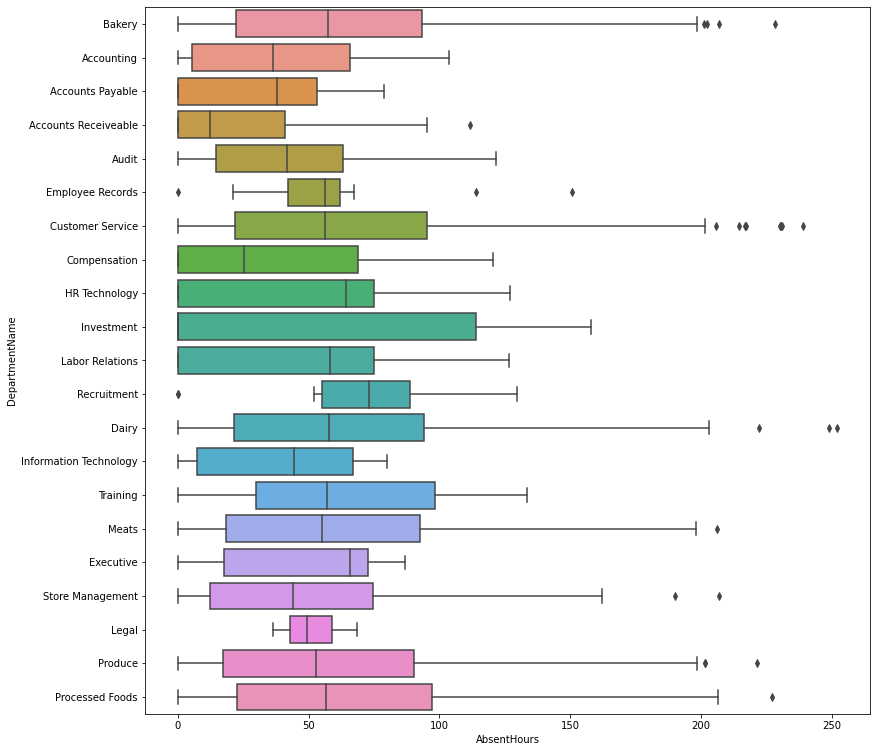

In [73]:
#Absent hous in each department
plt.figure(figsize = (13,13))
sns.boxplot(x='AbsentHours', y='DepartmentName', data = data)

Observation:

    .'Customer Service' and 'Bakery' have the most outliers i.e Employee from these department have the Most Absent Hours.
    . Dairy has the highest Absent hours among all department.
    . Department of Employee Records , Store management and Produce also have 100+ Absent Hours..

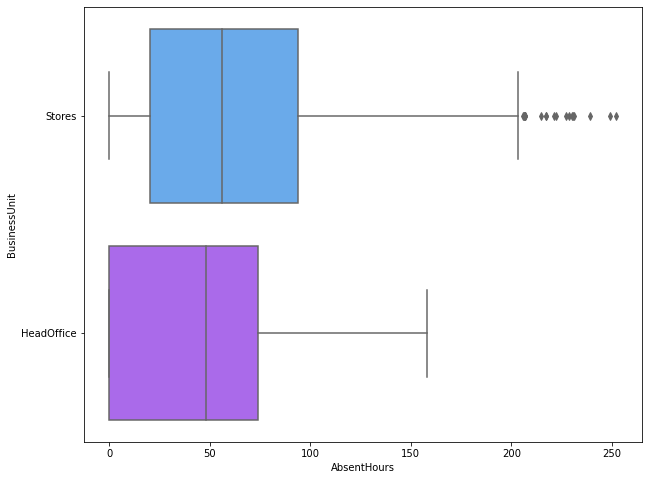

In [75]:
#absent hours in each business unit
plt.figure(figsize=(10,8))
sns.boxplot(x='AbsentHours', y='BusinessUnit',data = data, palette = 'cool');

Observation:

    ..Store Have much outlier which means longer AbsentHours than HeadOffice.

### HeatMap

<AxesSubplot:>

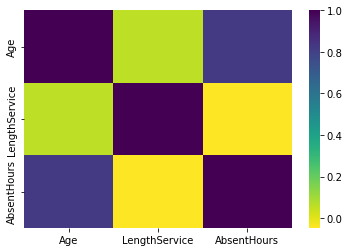

In [81]:
sns.heatmap(data.corr(), cmap='viridis_r')

In [82]:
data['LengthService'] = data['LengthService'].apply(lambda x: round(x))

In [84]:
data['LengthService'].value_counts()

5     2036
4     1964
6     1333
3     1248
7      606
2      494
8      168
1      144
9       27
0       20
18      16
14      15
12      12
10      10
19       8
11       7
15       5
13       5
17       5
16       4
32       4
22       4
21       4
27       4
24       3
34       3
39       3
26       3
37       2
23       2
44       1
36       1
25       1
35       1
30       1
20       1
Name: LengthService, dtype: int64

In [85]:
def length(l):
    if l<2:
        los='0-1'
    elif l<=5:
        los='2-5'
    elif l<=10:
        los='6-10'
    elif l<=20:
        los='11-20'
    elif l<=30:
        los='21-30'
    else:
        los='31-40'
    return los

In [86]:
data['LengthService'] = data['LengthService'].apply(length)

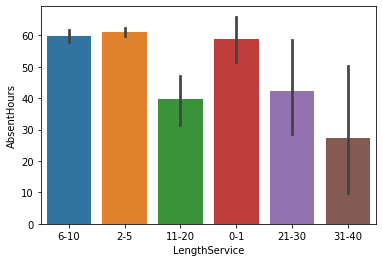

In [87]:
sns.barplot(data['LengthService'],data['AbsentHours']);

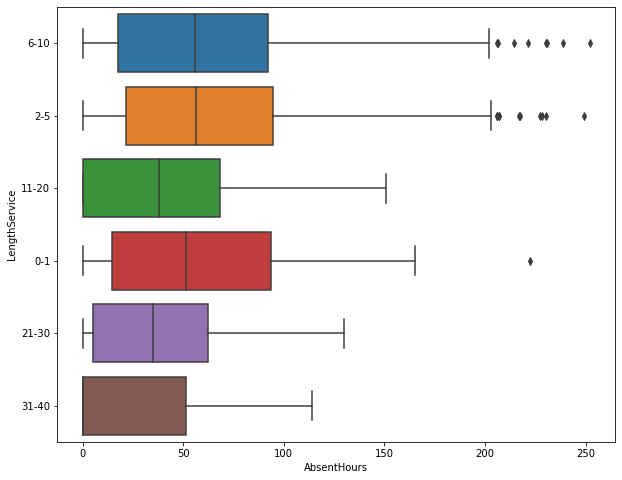

In [88]:
#absenthours in each length service
plt.figure(figsize = (10,8))
sns.boxplot(data['AbsentHours'],data['LengthService']);

Observation:

    . There seems no direct correlation between length of service and Absent hours .
    . People with Service length of '11-20' and '31-40' years have the Lowest Absent Hours.
    . People with Service length of '6-10' and '2-5' years have the Highest Absent Hours.

In [89]:
data.to_csv('HR_Absentees_data.csv')

# Final Conclusion:

1- As the 'Age Increases',the number of 'absent hours also increases.' i.e,
        Absent Hours is directly related to Age....

 ==> While Length of Service doesn't have any direct Correlation with AbsentHours 

2- According to dataset,'Absent Hours' is also correlated to 'Gender'. i.e,
        Female tend to have more AbsentHours than men.
            And also female are absent for longer duration than men.

3- Vancouver is the City or Store location with the Highest Absentees. i.e,
        Employees in Vancouver were comparatively 'more' absent than any City...

## --------------------------------------------------------------------------------------------------------------------------------